# Training Summary

In [20]:
import pandas as pd
import cPickle as pickle
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
%load_ext autoreload
%autoreload 2

In [22]:
plt.rcParams["figure.figsize"] = 10, 6

In [8]:
with open("data.pkl", "rb") as f:
    data = pickle.load(f)

In [27]:
print("Number of examples in training data: {}".format(len(data)))

Number of examples in training data: 7723


In [11]:
_, actions, rewards, _ = zip(*data)

datadf = pd.DataFrame({"action": actions, "reward": rewards})

## Data Summary

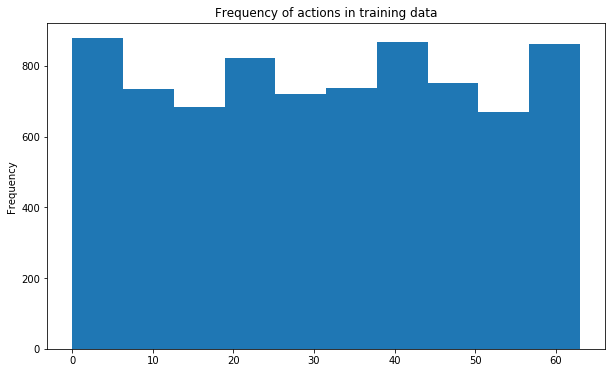

In [25]:
datadf.action.plot.hist(title="Frequency of actions in training data");

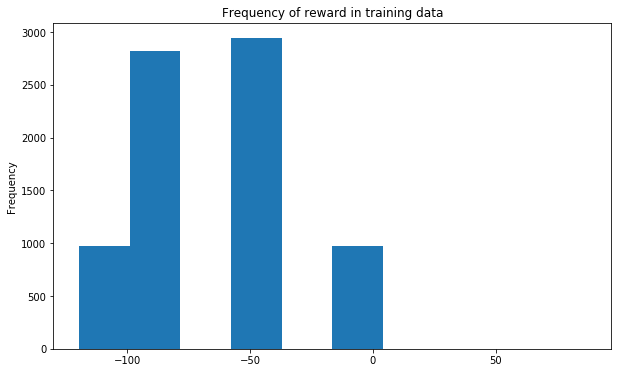

In [26]:
datadf.reward.plot.hist(title="Frequency of reward in training data");

## Policy History Summary

In [29]:
with open("policyHistory.pkl", "rb") as f:
    history = pickle.load(f)

In [32]:
print("Number of Training Iterations: {}".format(len(history)))

Number of Training Iterations: 7


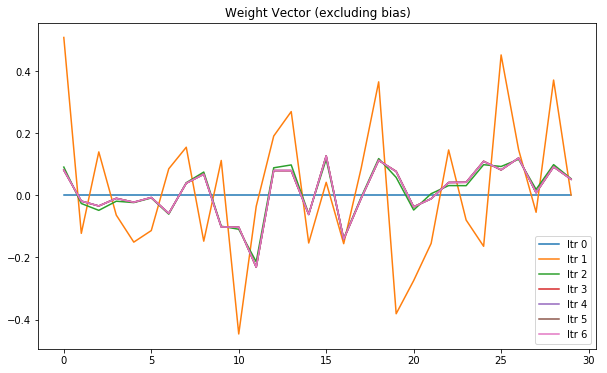

In [37]:
for itr, arr in enumerate(history):
    plt.plot(np.arange(len(arr[1:])), arr[1:], label="Itr {}".format(itr))
    
plt.title("Weight Vector (excluding bias)")
plt.legend(loc="lower right")
plt.show()

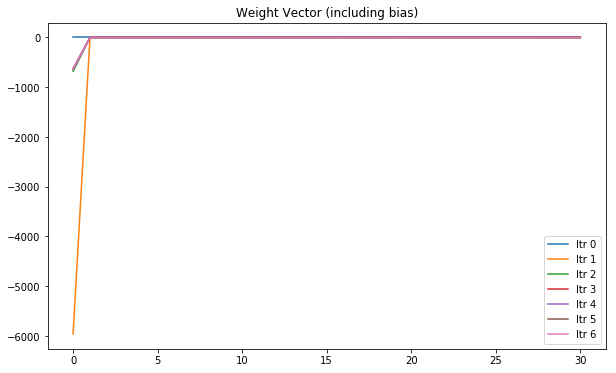

In [38]:
for itr, arr in enumerate(history):
    plt.plot(np.arange(len(arr)), arr, label="Itr {}".format(itr))
    
plt.title("Weight Vector (including bias)")
plt.legend(loc="lower right")
plt.show()

## Results Summary


In [50]:
results = pd.read_csv("./results.csv")

In [51]:
results.head()

,Unnamed: 0,goal,iteration,numSteps,reward,start,success
0,0,[-0.04395812 0.63991777 0.26560332],0,400,-5404.262142,[ 1.54849783 0.80087988 0.00288816],False
1,1,[ 0.91289658 0.4207035 -0.47322783],0,68,-836.212506,[ 1.55856045 0.79713324 0.00176033],False
2,2,[ 0.0635268 0.2333701 0.65771541],0,400,-5583.996791,[ 1.56109343 0.79644047 0.00784754],False
3,3,[-0.78464066 -0.63891229 0.51623446],0,400,-5468.547597,[ 1.57324744 0.79172316 0.01040237],False
4,4,[-0.28223631 0.80046322 -0.64683402],0,13,-75.434551,[ 1.59465172 0.78173375 0.01749855],False


In [52]:
import seaborn as sns

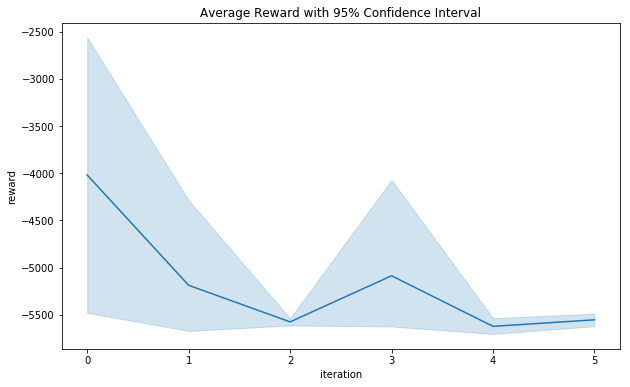

In [54]:
ciSize = 95
sns.lineplot(x="iteration", y="reward", ci=ciSize, data=results, estimator="mean")
plt.title("Average Reward with {}% Confidence Interval".format(ciSize))

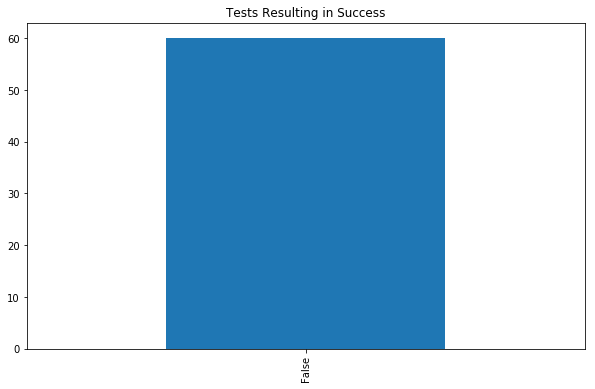

In [58]:
results.success.value_counts().plot.bar(title="Tests Resulting in Success")